In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ler o dataset
data = pd.read_csv('Machine Failure Prediction using Sensor data.csv')

# Separar as features (X) e o alvo (y)
X = data.drop(columns=['fail'])  # Todas as colunas, exceto a variável alvo
y = data['fail']

# Dividir os dados em treino (70%), validação (15%) e teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Verificar tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")


Tamanho do conjunto de treino: 660
Tamanho do conjunto de validação: 142
Tamanho do conjunto de teste: 142



Resultados para o Kernel: Linear
  Acurácia: 0.94
  Precisão: 0.94
  Recall: 0.94
  F1-Score: 0.94
  ROC AUC: 0.98

Matriz de Confusão:
  [ Verdadeiro Negativo, Falso Positivo ]
  [ Falso Negativo, Verdadeiro Positivo ]
[[79  4]
 [ 5 54]]


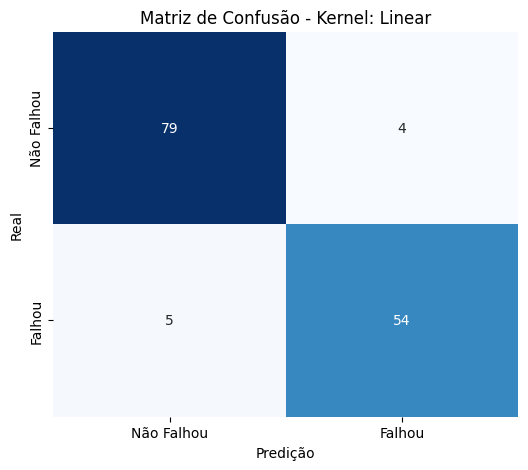

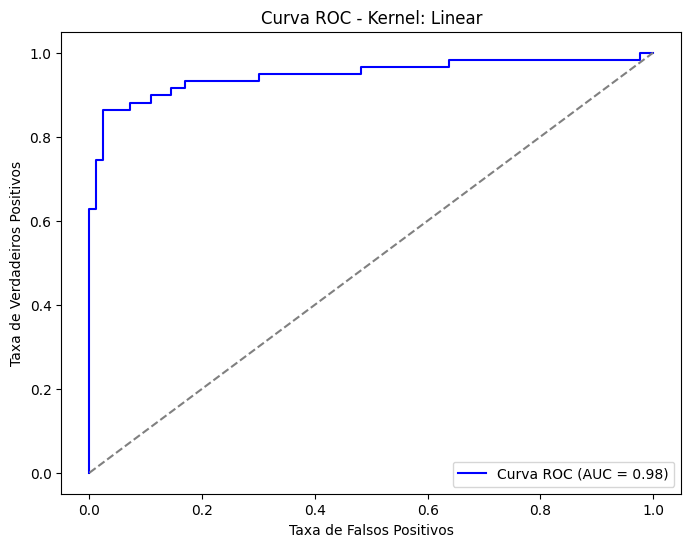


Resultados para o Kernel: Rbf
  Acurácia: 0.94
  Precisão: 0.94
  Recall: 0.94
  F1-Score: 0.94
  ROC AUC: 0.98

Matriz de Confusão:
  [ Verdadeiro Negativo, Falso Positivo ]
  [ Falso Negativo, Verdadeiro Positivo ]
[[80  3]
 [ 6 53]]


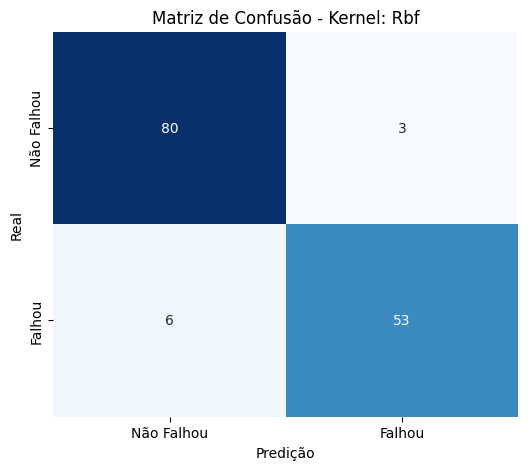

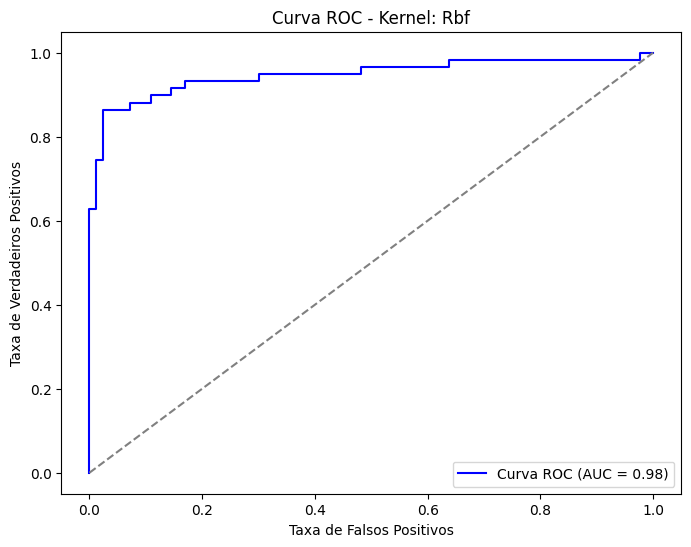


Resultados para o Kernel: Poly
  Acurácia: 0.94
  Precisão: 0.94
  Recall: 0.94
  F1-Score: 0.94
  ROC AUC: 0.98

Matriz de Confusão:
  [ Verdadeiro Negativo, Falso Positivo ]
  [ Falso Negativo, Verdadeiro Positivo ]
[[79  4]
 [ 5 54]]


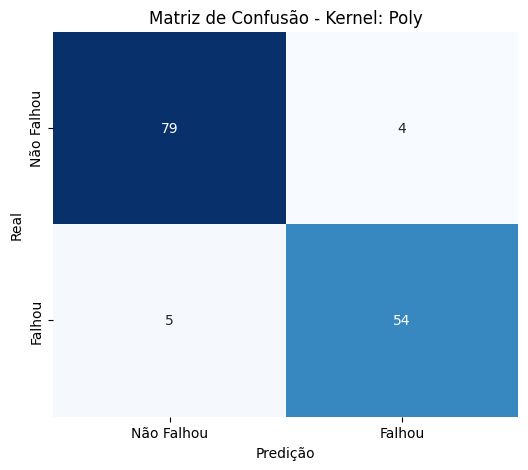

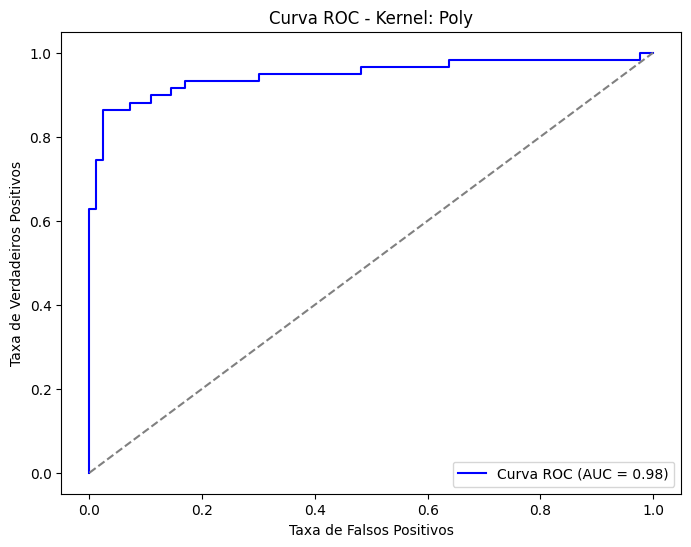


Resultados para o Kernel: Sigmoid
  Acurácia: 0.90
  Precisão: 0.90
  Recall: 0.90
  F1-Score: 0.90
  ROC AUC: 0.95

Matriz de Confusão:
  [ Verdadeiro Negativo, Falso Positivo ]
  [ Falso Negativo, Verdadeiro Positivo ]
[[77  6]
 [ 8 51]]


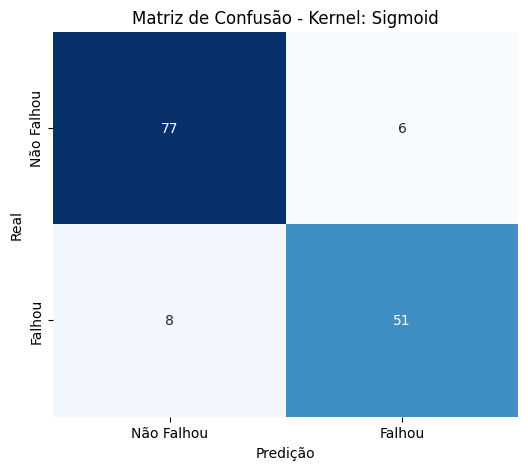

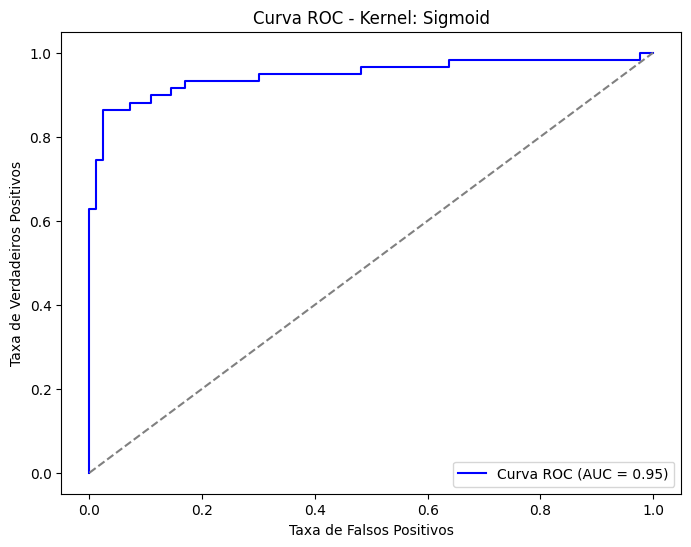

In [2]:
# Parte 2: Treinamento e Avaliação do Modelo

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Definir os kernels para teste
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

# Treinar e avaliar modelos para cada kernel
for kernel in kernels:
    # Criar e treinar o modelo
    svm = SVC(kernel=kernel, random_state=42, probability=True)  # Para calcular a curva ROC
    svm.fit(X_train_scaled, y_train)
    
    # Avaliar no conjunto de validação
    y_val_pred = svm.predict(X_val_scaled)
    
    # Gerar o relatório de classificação
    report = classification_report(y_val, y_val_pred, output_dict=True)
    
    # Gerar a matriz de confusão
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Calcular a curva ROC e a área sob a curva (AUC)
    fpr, tpr, _ = roc_curve(y_val, svm.predict_proba(X_val_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Armazenar os resultados
    results[kernel] = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'confusion_matrix': cm,
        'roc_auc': roc_auc
    }

# Exibir os resultados
for kernel, metrics in results.items():
    print(f"\n{'='*40}")
    print(f"Resultados para o Kernel: {kernel.capitalize()}")
    print(f"{'='*40}")
    print(f"  Acurácia: {metrics['accuracy']:.2f}")
    print(f"  Precisão: {metrics['precision']:.2f}")
    print(f"  Recall: {metrics['recall']:.2f}")
    print(f"  F1-Score: {metrics['f1-score']:.2f}")
    print(f"  ROC AUC: {metrics['roc_auc']:.2f}")
    
    # Exibir a Matriz de Confusão
    print("\nMatriz de Confusão:")
    print(f"  [ Verdadeiro Negativo, Falso Positivo ]")
    print(f"  [ Falso Negativo, Verdadeiro Positivo ]")
    print(metrics['confusion_matrix'])
    
    # Plotar a Matriz de Confusão
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Não Falhou', 'Falhou'], yticklabels=['Não Falhou', 'Falhou'])
    plt.title(f'Matriz de Confusão - Kernel: {kernel.capitalize()}')
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.show()

    # Plotar a Curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {metrics["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC - Kernel: {kernel.capitalize()}')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
import pygad
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Função de avaliação do modelo para otimização com múltiplas métricas (K-fold Cross-Validation)
def evaluate_svm(ga_instance, solution, solution_idx, kernel, X, y, k=5):
    # Parâmetros do modelo
    C = solution[0]
    gamma = solution[1] if kernel == 'rbf' or kernel == 'poly' else 'scale'
    
    # K-Fold Cross-Validation
    kf = KFold(n_splits=k, random_state=42, shuffle=True)   #K-fold
    
    # Variáveis para armazenar as métricas médias
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    # Executar k-fold cross-validation
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Normalizar os dados de treino e validação
        # (se necessário, aplique a normalização aqui)
        
        # Criar e treinar o modelo SVM com os parâmetros
        svm = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42, probability=True)
        svm.fit(X_train, y_train)
        
        # Fazer previsões e calcular as métricas
        y_val_pred = svm.predict(X_val)
        
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred, average='weighted')
        recall = recall_score(y_val, y_val_pred, average='weighted')
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        
        # Armazenar as métricas para cada fold
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    # Calcular as médias das métricas para k-folds
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)
    
    # Retorna o F1-Score médio como critério de otimização
    return avg_f1

# Função para otimização de parâmetros de cada kernel usando PyGAD
def optimize_kernel_parameters(kernel, X, y, k=5):
    # Definir o espaço de parâmetros a ser otimizado (C e gamma)
    def fitness_function(ga_instance, solution, solution_idx):
        return evaluate_svm(ga_instance, solution, solution_idx, kernel, X, y, k)
    
    # Definir o espaço de busca dos parâmetros (C e gamma)
    num_genes = 2  # C e gamma
    gene_space = [
        np.linspace(0.01, 100, 100),  # Valores de C
        np.linspace(0.0001, 1, 100)   # Valores de gamma (aplicável para kernels como RBF e Poly)
    ]
    
    # Configuração do algoritmo genético
    num_generations = 3  # Número de gerações
    num_parents_mating = 3  # Número de pais que vão gerar a próxima geração
    sol_per_pop = 5  # Tamanho da população
    num_genes = 2  # C e gamma

    # Criar o objeto GA (removido o elitism)
    ga_instance = pygad.GA(
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        gene_space=gene_space,
        parent_selection_type="sss",  # Seleção por torneio
        crossover_type="uniform",  # Tipo de crossover
        crossover_probability=0.8,
        mutation_type="random",  # Tipo de mutação
        mutation_probability=0.2
    )
    
    # Executar o algoritmo genético
    ga_instance.run()
    
    # Melhor solução encontrada
    best_solution, best_solution_fitness, _ = ga_instance.best_solution()

    # Exibir as métricas para a melhor solução
    print(f"\nResultados Otimizados para o Kernel '{kernel}'")
    print("="*40)
    
    # Criar e treinar o modelo final com a melhor solução
    C = best_solution[0]
    gamma = best_solution[1] if kernel == 'rbf' or kernel == 'poly' else 'scale'
    svm = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42, probability=True)
    svm.fit(X, y)
    
    # Prever no conjunto de validação (ou teste)
    y_pred = svm.predict(X)
    
    # Calcular todas as métricas
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    # Exibir as métricas
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("="*40)
    
    return best_solution, best_solution_fitness

# Agora, vamos otimizar para cada kernel separadamente
# X e y são os dados de entrada (features e labels) e já foram definidos anteriormente
best_solution_linear, best_f1_linear = optimize_kernel_parameters('linear', X, y)
best_solution_rbf, best_f1_rbf = optimize_kernel_parameters('rbf', X, y)
best_solution_poly, best_f1_poly = optimize_kernel_parameters('poly', X, y)


c:\Users\emanu\my-project\.venv\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")



Resultados para o Kernel 'linear'
F1-Score: 0.9367
Accuracy: 0.9366
Precision: 0.9369
Recall: 0.9366

Resultados Otimizados para o Kernel Linear
F1-Score: 0.9367
Accuracy: 0.9366
Precision: 0.9369
Recall: 0.9366


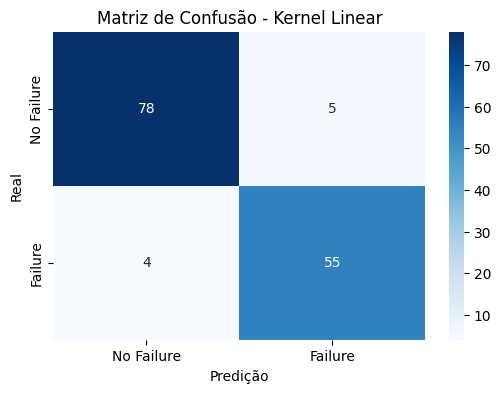

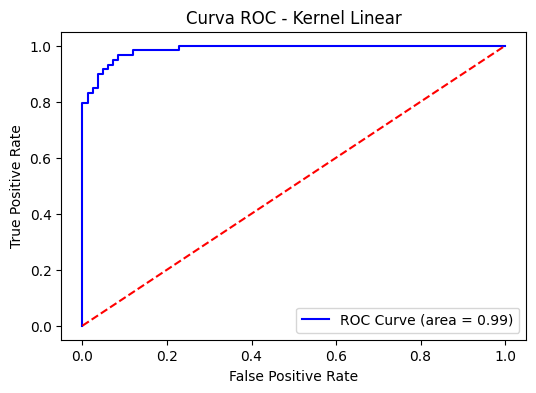

In [76]:
# Otimização para o Kernel Linear
best_solution_linear, best_f1_linear = optimize_kernel_parameters('linear', X_train_scaled, y_train, X_val_scaled, y_val)

# Exibir os resultados otimizados para o Kernel Linear
print(f"\n{'='*40}")
print(f"Resultados Otimizados para o Kernel Linear")
print(f"{'='*40}")

# Criar e treinar o modelo final com a melhor solução para o kernel linear
C = best_solution_linear[0]
svm_linear = SVC(kernel='linear', C=C, random_state=42, probability=True)
svm_linear.fit(X_train_scaled, y_train)

# Prever no conjunto de validação
y_val_pred_linear = svm_linear.predict(X_val_scaled)

# Calcular as métricas
accuracy = accuracy_score(y_val, y_val_pred_linear)
precision = precision_score(y_val, y_val_pred_linear, average='weighted')
recall = recall_score(y_val, y_val_pred_linear, average='weighted')
f1 = f1_score(y_val, y_val_pred_linear, average='weighted')

# Exibir as métricas
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Matriz de Confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_val_pred_linear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("Matriz de Confusão - Kernel Linear")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# Curva ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val, svm_linear.predict_proba(X_val_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Kernel Linear')
plt.legend(loc='lower right')
plt.show()


c:\Users\emanu\my-project\.venv\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")



Resultados para o Kernel 'rbf'
F1-Score: 0.9577
Accuracy: 0.9577
Precision: 0.9577
Recall: 0.9577


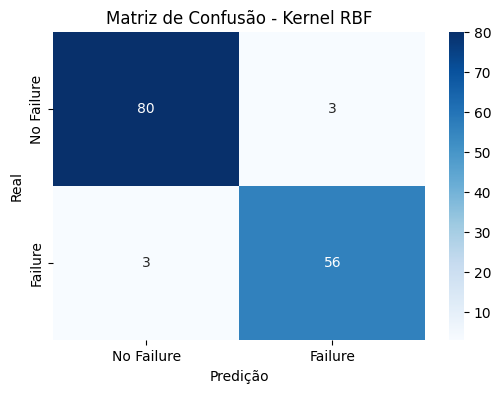

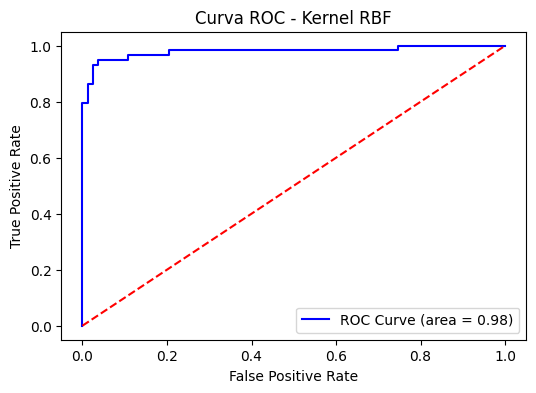

F1-Score: 0.9577
Accuracy: 0.9577
Precision: 0.9492
Recall: 0.9492


In [77]:
# Otimização para o Kernel RBF
best_solution_rbf, best_f1_rbf = optimize_kernel_parameters('rbf', X_train_scaled, y_train, X_val_scaled, y_val)

# Treinamento do modelo com os melhores parâmetros
svm_rbf = SVC(kernel='rbf', C=best_solution_rbf[0], gamma=best_solution_rbf[1], probability=False)
svm_rbf.fit(X_train_scaled, y_train)

# Avaliação no conjunto de validação
y_val_pred_rbf = svm_rbf.predict(X_val_scaled)

# Matriz de Confusão
cm = confusion_matrix(y_val, y_val_pred_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("Matriz de Confusão - Kernel RBF")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# Curva ROC usando decision_function
fpr, tpr, _ = roc_curve(y_val, svm_rbf.decision_function(X_val_scaled))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Kernel RBF')
plt.legend(loc='lower right')
plt.show()

# Exibir os resultados otimizados
print(f"F1-Score: {best_f1_rbf:.4f}")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_rbf):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_rbf):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_rbf):.4f}")


c:\Users\emanu\my-project\.venv\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")



Resultados otimizados para o Kernel 'poly'
F1-Score: 0.9296
Accuracy: 0.9296
Precision: 0.9296
Recall: 0.9296


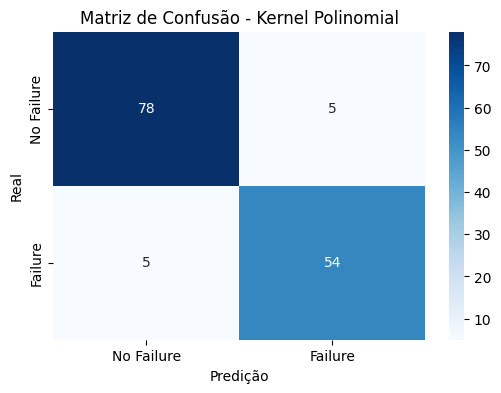

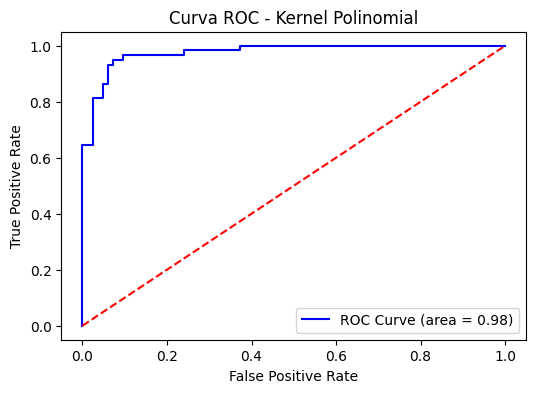

In [62]:
# Otimização para o Kernel Polinomial
best_solution_poly, best_f1_poly = optimize_kernel_parameters('poly', X_train_scaled, y_train, X_val_scaled, y_val)

# Treinamento do modelo com os melhores parâmetros
svm_poly = SVC(kernel='poly', C=best_solution_poly[0], gamma=best_solution_poly[1], probability=False)
svm_poly.fit(X_train_scaled, y_train)

# Avaliação no conjunto de validação
y_val_pred_poly = svm_poly.predict(X_val_scaled)

# Matriz de Confusão
cm = confusion_matrix(y_val, y_val_pred_poly)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("Matriz de Confusão - Kernel Polinomial")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# Curva ROC usando decision_function
fpr, tpr, _ = roc_curve(y_val, svm_poly.decision_function(X_val_scaled))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Kernel Polinomial')
plt.legend(loc='lower right')
plt.show()


c:\Users\emanu\my-project\.venv\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")



Resultados otimizados para o Kernel 'sigmoid'
F1-Score: 0.9081
Accuracy: 0.9085
Precision: 0.9085
Recall: 0.9085


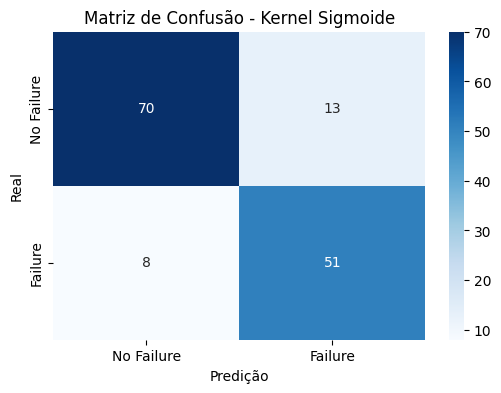

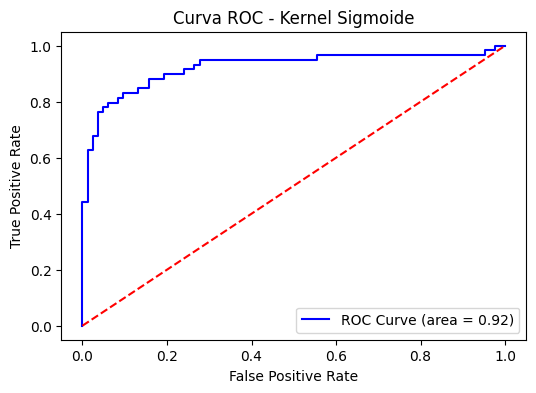

F1-Score: 0.9081
Accuracy: 0.8521


In [64]:
# Otimização para o Kernel Sigmoide
best_solution_sigmoid, best_f1_sigmoid = optimize_kernel_parameters('sigmoid', X_train_scaled, y_train, X_val_scaled, y_val)

# Treinamento do modelo com os melhores parâmetros
svm_sigmoid = SVC(kernel='sigmoid', C=best_solution_sigmoid[0], gamma=best_solution_sigmoid[1], probability=False)
svm_sigmoid.fit(X_train_scaled, y_train)

# Avaliação no conjunto de validação
y_val_pred_sigmoid = svm_sigmoid.predict(X_val_scaled)

# Matriz de Confusão
cm = confusion_matrix(y_val, y_val_pred_sigmoid)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("Matriz de Confusão - Kernel Sigmoide")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# Curva ROC usando decision_function
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val, svm_sigmoid.decision_function(X_val_scaled))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Kernel Sigmoide')
plt.legend(loc='lower right')
plt.show()